# Python XDF Reader

## Initial Steps

### Import Libraries

In [1]:
import os
import logging
import pyxdf
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy.fft import fftshift

### Import Data from XDF file

In [2]:
#path = '/Users/admin/Documents/CurrentStudy/sub-P001/ses-S002/eeg'
#path = '/Users/admin/Desktop/sub-P001/ses-S001/eeg'
#path = '/Users/Min/Documents/CurrentStudy/sub-P001/ses-S001/eeg' # write directory towards xdf file
path = '/Users/Min/Documents/CurrentStudy/sub-P001/ses-S001/'
#path = '/Users/Min/OneDrive - UC San Diego/Documents/CurrentStudy/'

path = '/Users/Min/Documents/CurrentStudy/' # write directory towards xdf file
logging.basicConfig(level=logging.DEBUG)  # Use logging.INFO to reduce output.
#fname = os.path.abspath(os.path.join(os.path.dirname(path),'eeg', 'StringTest.xdf'))
#fname = os.path.abspath(os.path.join(os.path.dirname(path),'Desktop', 'sub-P001_ses-S001_task-T1_run-001_eeg.xdf'))
filename = 'WeDAQTesting.xdf'
fname = os.path.abspath(os.path.join(os.path.dirname(path),'20231025', filename))
streams, fileheader = pyxdf.load_xdf(fname)

print("Found {} streams:".format(len(streams)))
for ix, stream in enumerate(streams):
    print("Stream {}: {} - type {} - uid {} - shape {} at {} Hz (effective {} Hz)".format(
        ix + 1, stream['info']['name'][0],
        stream['info']['type'][0],
        stream['info']['uid'][0],
        (int(stream['info']['channel_count'][0]), len(stream['time_stamps'])),
        stream['info']['nominal_srate'][0],
        stream['info']['effective_srate'])
    )
    if any(stream['time_stamps']):
        print("\tDuration: {} s".format(stream['time_stamps'][-1] - stream['time_stamps'][0]))
print("Done.")

INFO:pyxdf.pyxdf:Importing XDF file C:\Users\Min\Documents\CurrentStudy\20231025\WeDAQTesting.xdf...
DEBUG:pyxdf.pyxdf: Read tag: 2 at 71 bytes, length=633, StreamId=1
DEBUG:pyxdf.pyxdf:  found stream WeDAQ1
DEBUG:pyxdf.pyxdf: Read tag: 3 at 709 bytes, length=78097, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [19,1014]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 78811 bytes, length=78251, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [19,1016]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 157067 bytes, length=78251, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [19,1016]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 235323 bytes, length=78097, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [19,1014]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 313425 bytes, length=76711, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [19,996]
DEBUG:pyxdf.pyxdf: Read tag: 4 at 390138 bytes, length=22, StreamId=1
DEBUG:pyxdf.pyxdf: Read tag: 3 at 390165 bytes, length=77558, StreamId=1
DEBUG:pyxdf.pyxdf:  reading [19,1007]
DEBUG:pyxdf.pyxdf: Read tag: 3 at 467728 bytes, length=77866,

Found 1 streams:
Stream 1: WeDAQ1 - type EEG - uid 4571935b-f265-4e1b-9b6e-84f84935ecdf - shape (19, 30258) at 1000.000000000000 Hz (effective 996.3442074873435 Hz)
	Duration: 30.36802284634905 s
Done.


In [3]:
stream

{'info': defaultdict(list,
             {'name': ['WeDAQ1'],
              'type': ['EEG'],
              'channel_count': ['19'],
              'channel_format': ['float32'],
              'source_id': ['WeDAQtest1'],
              'nominal_srate': ['1000.000000000000'],
              'version': ['1.100000000000000'],
              'created_at': ['277568.7565387000'],
              'uid': ['4571935b-f265-4e1b-9b6e-84f84935ecdf'],
              'session_id': ['default'],
              'hostname': ['ISN-Interface'],
              'v4address': [None],
              'v4data_port': ['16572'],
              'v4service_port': ['16572'],
              'v6address': [None],
              'v6data_port': ['16572'],
              'v6service_port': ['16572'],
              'desc': [None],
              'stream_id': 1,
              'effective_srate': 996.3442074873435}),
 'footer': {'info': defaultdict(list,
              {'first_timestamp': ['278198.1636188'],
               'last_timestamp': ['27

### Initialize Variables

In [4]:
select_stream = 0 # select the stream (Please look at this)
singledchan = 0 # selected single channel for the single channel plots
stream = streams[select_stream] # get selected stream
Fs = stream['info']['nominal_srate'] # get the effective sampling rate
select_channel = 1 # select one channel. This is for single plots
N = int(stream['footer']['info']['sample_count'][0]) # get number of samples
channum = int(stream['info']['channel_count'][0]) # get number of channels
data_Y = stream['time_series'] # get time series data
data_X = stream['time_stamps'] # get time stamp data
data_X = (data_X-min(data_X))

#Fs = int(Fs[0])
Fs = int(float(Fs[0]))
print("Sampling Rate:", Fs)

Sampling Rate: 1000


### Trim Data 

In [5]:
trimming = False;
if trimming: # change to true if you do want to trim data
    startidx = 127*Fs; # start idx of trim
    endidx = 142*Fs; # end idx of trim
    trimrange = list(range(startidx,endidx)) # create list from start and end idx
    data_Y = data_Y[trimrange,:] # new data
    data_X = data_X[trimrange] # end data

In [6]:
print(stream['time_stamps'] - min(stream['time_stamps']))

[0.00000000e+00 1.00366934e-03 2.00733868e-03 ... 3.03660155e+01
 3.03670192e+01 3.03680228e+01]


## Filtered Data

Text(0, 0.5, 'Amplitude')

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplot

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugi.ttf)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Constantia' (constani.ttf) it

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.33

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 70

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 3.6863636363636365
DEBUG:matplotlib.font_manager:findfont: score(<Font 'TeamViewer15' (teamviewer15.otf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'S

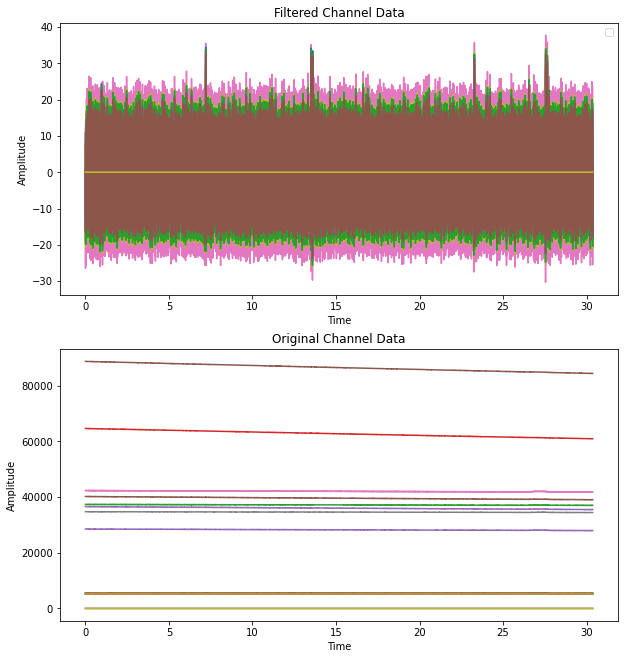

In [7]:
# Initialize Variables
F0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
data_Y = stream['time_series'] # get time series data
data_X = stream['time_stamps'] # get time stamp data
data_X = (data_X-min(data_X))

# Define the bandpass filter parameters
low_cutoff = 0.5  # Low cutoff frequency in Hz
high_cutoff = 10.0  # High cutoff frequency in Hz
fs = 100  # Sampling frequency in Hz

# Design a bandpass filter using scipy.signal.butter
order = 4  # Filter order
b, a = signal.butter(order, [low_cutoff * 2 / fs, high_cutoff * 2 / fs], btype='band')

# Apply the bandpass filter to the channel data
filtered_data = signal.filtfilt(b, a, np.transpose(data_Y))

# Plot original and filtered data
plt.figure(figsize=(10, 11))
plt.subplot(2, 1, 1)
for i in range(channum):
    plt.plot(data_X,filtered_data[i]);
plt.title('Filtered Channel Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(data_X,data_Y)
plt.title('Original Channel Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')


(10.0, 11.0)

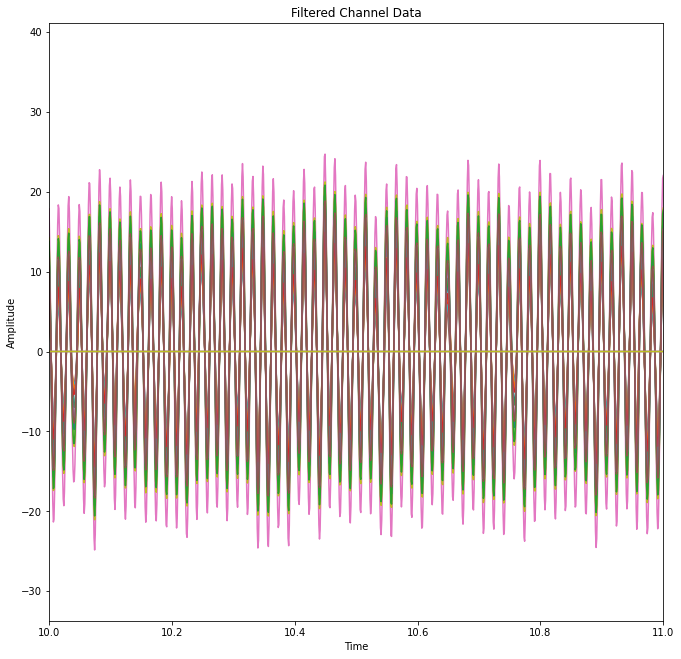

In [8]:
# Plot original and filtered data
plt.figure(figsize=(11, 11))
for i in range(channum):
    plt.plot(data_X,filtered_data[i]);
plt.title('Filtered Channel Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim((10,11))
#plt.ylim((-600,600))
#plt.legend()

DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so ti

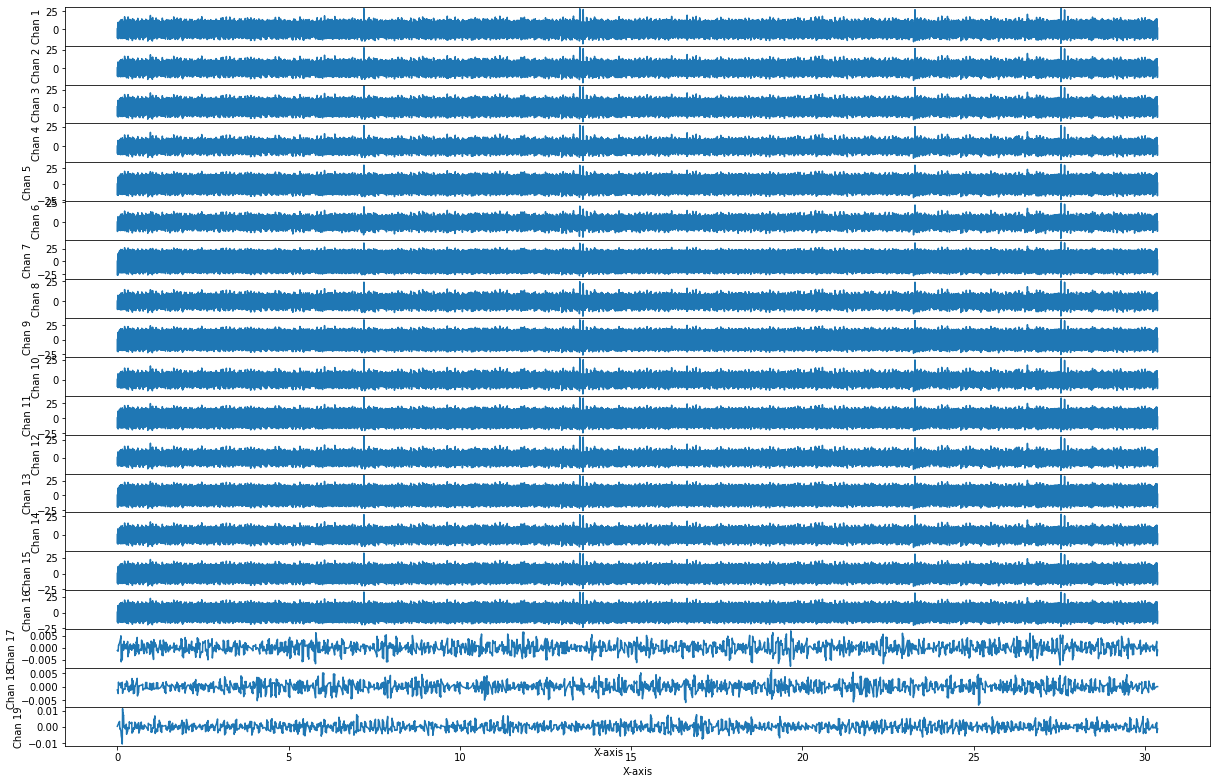

In [9]:
# Creating data for plotting
x = np.linspace(0, 10, 100)
y_values = [np.sin(x), np.cos(x), np.tan(x)]

# Creating a compact grid of subplots with shared x-axis and adjacent boundaries
fig, axs = plt.subplots(channum, 1, figsize=(17, 11), sharex=True, gridspec_kw={'hspace': 0})

# Plotting on subplots
for i, y in enumerate(filtered_data):
    axs[i].plot(data_X, y)
    axs[i].set_ylabel(f'Chan {i+1}')


# Adding shared x-axis label
fig.text(0.5, 0.04, 'X-axis', ha='center', fontsize=10)
plt.xlabel('X-axis')
#plt.xlim((10,20))

# Adjusting layout for better spacing and removing extra spaces
plt.tight_layout()
plt.subplots_adjust(hspace=0)

# Display the subplots
plt.show()

### PSD Unfiltered (All)

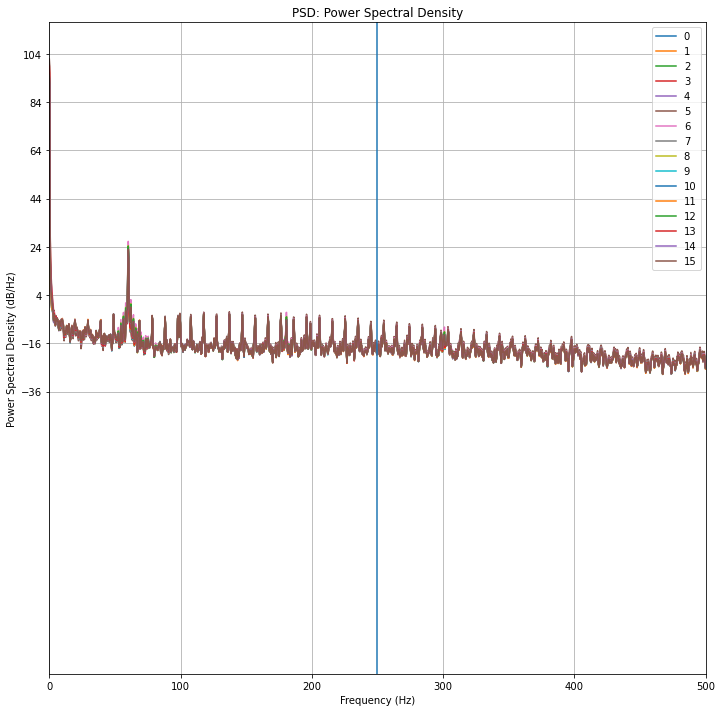

In [10]:
plt.figure(figsize=(10, 10));
for i in range(16):
    plt.psd(data_Y[:,i],NFFT=round(N/10),Fs=Fs, label=i);
    
plt.axvline(Fs/4);
plt.title('PSD: Power Spectral Density');
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power Spectral Density (dB/Hz)');
plt.tight_layout();
#plt.xticks(np.arange(100))
plt.xlim((0,Fs/2));
plt.ylim((-153,117));
plt.legend(loc='upper right')
plt.show();

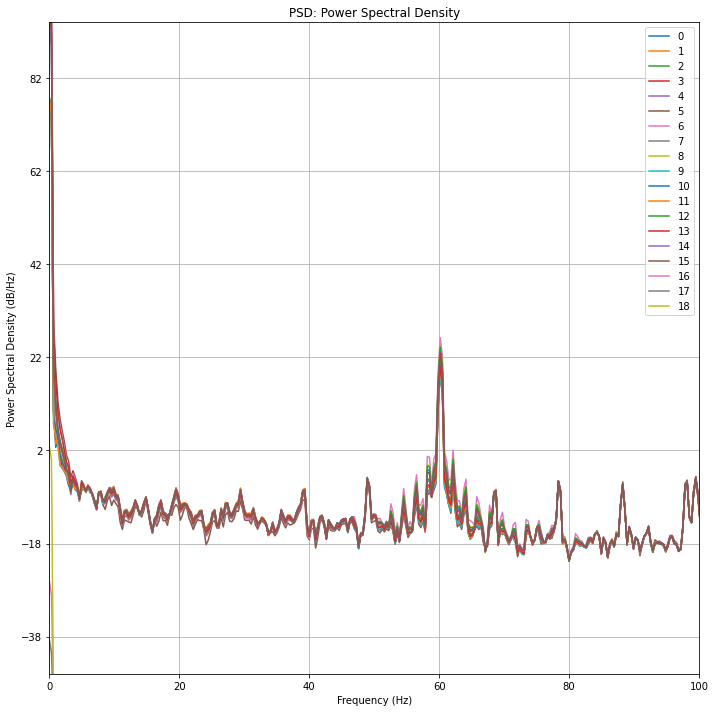

In [11]:
plt.figure(figsize=(10, 10));

for i in range(channum):
    plt.psd(data_Y[:,i],NFFT=round(N/10),Fs=Fs, label=i);
    
plt.axvline(Fs/4);
plt.title('PSD: Power Spectral Density');
plt.xlabel('Frequency (Hz)');
plt.ylabel('Power Spectral Density (dB/Hz)');
plt.tight_layout();
#plt.xticks(np.arange(100))
plt.xlim((0,100));
plt.ylim((-46,94));
plt.legend(loc='upper right')

## Unfiltered Analysis 

### Plot Time-Series Unfiltered (All)

print(channum)
fig, axs = plt.subplots(channum,sharex=True)
for i in range(channum):
    axs[i].plot(data_X, data_Y[:,i])
    axs[i].set_xlim(10,20)
    
fig.suptitle('Time-Series Unfiltered')
fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png',format='jpg')
# Adjust layout for better spacing
#plt.tight_layout()
plt.subplots_adjust(wspace=0)
# Display the subplots
plt.show()

### Plot Time-Series Unfiltered (Single)

singledchan = 4
plt.figure(figsize=(18.5, 10.5))
plt.plot(data_X, data_Y[:,singledchan])
#plt.xlim((data_X[0],data_X[0]))
#plt.xlim(10,50)

### PSD Unfiltered (Single)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=17.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplot

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugi.ttf)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Constantia' (constani.ttf) it

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.33

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft YaHei' (msyhbd.ttc) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbeli.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisb.ttf) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft YaHei' (msyh.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Marlett' (marlett.ttf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Symbol' (symbol.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candarab.ttf) normal normal 70

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal 900 normal>) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 3.6863636363636365
DEBUG:matplotlib.font_manager:findfont: score(<Font 'TeamViewer15' (teamviewer15.otf) normal normal 500 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Yi Baiti' (msyi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Constantia' (constanz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'S

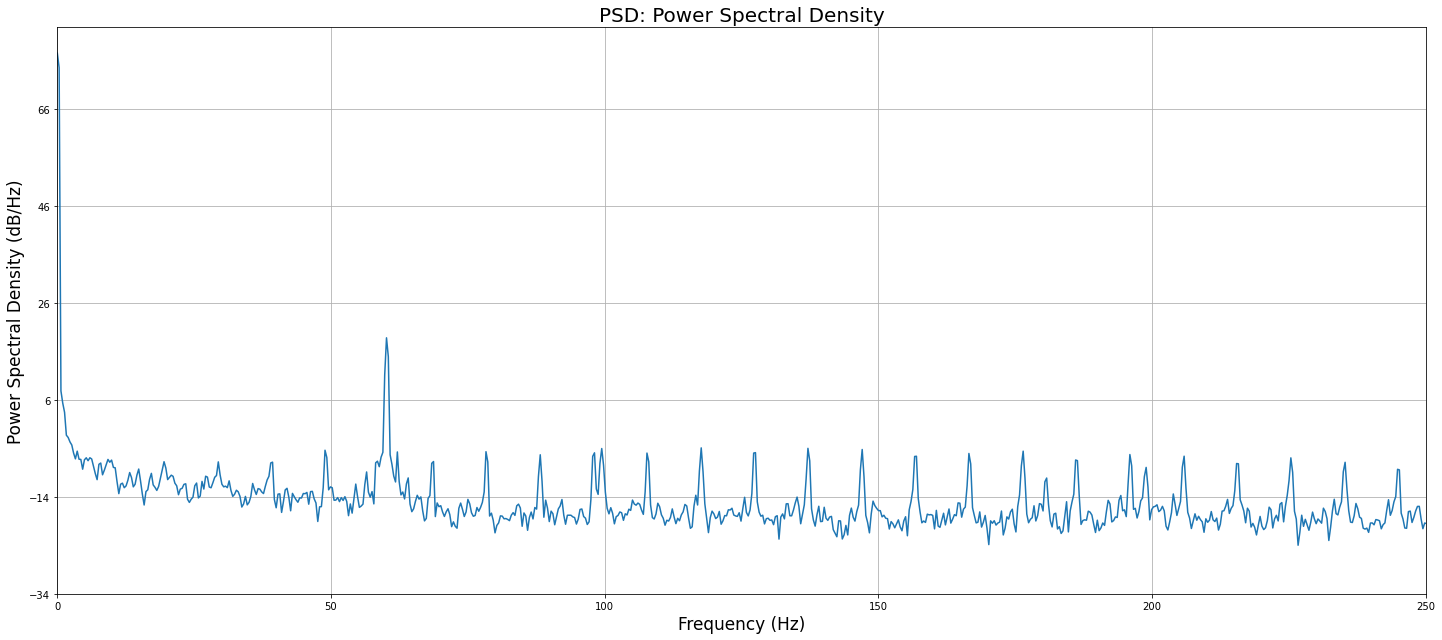

In [12]:
plt.figure(figsize=(20, 9));
[Pxx, freqs] = plt.psd(data_Y[:,9],NFFT=round(N/10),Fs=Fs);
plt.title('PSD: Power Spectral Density',fontsize=20);
plt.xlabel('Frequency (Hz)',fontsize=17);
plt.ylabel('Power Spectral Density (dB/Hz)',fontsize=17);
plt.tight_layout();
#plt.xticks(np.arange(250))
plt.xlim((0,250));
plt.show();

### Spectrogram Unfiltered (Single)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=18.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplot

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 7.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe Script' (segoescb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibri.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelli.ttf) italic normal 300 normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugi.ttf)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuisl.ttf) normal normal 350 normal>) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nirmala UI' (Nirmala.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbell.ttf) normal normal 300 normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Constantia' (constani.ttf) it

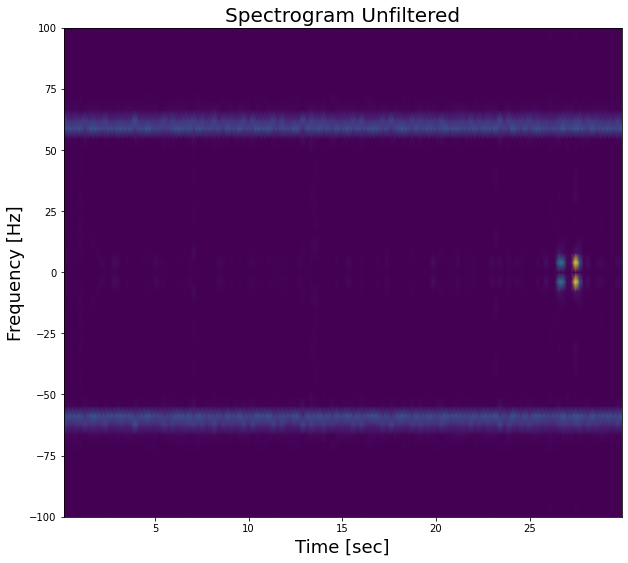

In [13]:
plt.figure(figsize=(10, 9));
freqs, time, Sxx = signal.spectrogram(data_Y[:,singledchan], Fs,return_onesided=False)
plt.pcolormesh(time, fftshift(freqs), fftshift(Sxx,axes=0), shading='gouraud')
plt.title('Spectrogram Unfiltered',fontsize=20)
plt.ylabel('Frequency [Hz]',fontsize=18)
plt.xlabel('Time [sec]',fontsize=18)
plt.ylim((-100,100))
plt.show()

## Impedance

### Impedance Calculation

(0.001, 0.002)

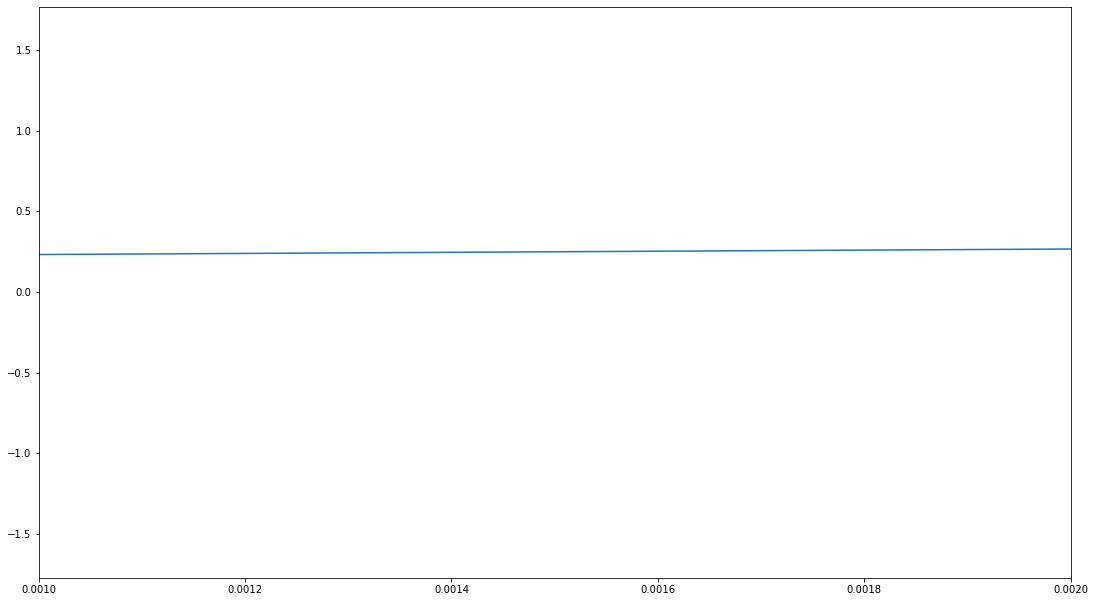

In [14]:
fdata_Y = []
b, a = signal.butter(4, [19,21], btype='bandpass', fs=Fs)
w, h = signal.freqs(b, a)
# Apply Filter
for i in range(channum):
    fdata_Y.append(signal.filtfilt(b,a,data_Y[:,i]))
    
plt.figure(figsize=(18.5, 10.5))
plt.plot(data_X, fdata_Y[0])
plt.xlim([0.001, 0.002])
#plt.xlim((data_X[0],data_X[0]))

### PSD Filtered for Impedance (All)

plt.figure(figsize=(10, 9));
for i in range(channum):
    plt.psd(fdata_Y[i],NFFT=round(N/10),Fs=Fs);

plt.title('PSD: Power Spectral Density',fontsize=20);
plt.xlabel('Frequency (Hz)',fontsize=17);
plt.ylabel('Power Spectral Density (dB/Hz)',fontsize=17);
plt.tight_layout();
plt.xlim((0,100));
plt.show();

### Finds Which Channels are Railed

idx = [i for i,v in enumerate(freqs) if v > 50 and v < 100]
for i in range(channum):
    [Pxx, freqs] = plt.psd(data_Y[:,i],NFFT=round(N/10),Fs=Fs);
    if np.mean(10*np.log10(Pxx[idx])) < -16:
        print(i)
#print(Pxx)
#0,3,5,6,7,8,9,10,11,15

## Filtered

### Apply Filter

# Initialize Variables
F0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
data_Y = stream['time_series'] # get time series data
data_X = stream['time_stamps'] # get time stamp data
data_X = (data_X-min(data_X))

# Define the bandpass filter parameters
low_cutoff = 0.5  # Low cutoff frequency in Hz
high_cutoff = 10.0  # High cutoff frequency in Hz
fs = 100  # Sampling frequency in Hz

# Design a bandpass filter using scipy.signal.butter
order = 4  # Filter order
b, a = signal.butter(order, [low_cutoff * 2 / fs, high_cutoff * 2 / fs], btype='band')

# Apply the bandpass filter to the channel data
filtered_data = signal.filtfilt(b, a, np.transpose(data_Y))

# Plot original and filtered data
plt.figure(figsize=(10, 11))
plt.subplot(2, 1, 1)
for i in range(channum):
    plt.plot(data_X,filtered_data[i]);
plt.title('Filtered Channel Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(data_X,data_Y)
plt.title('Original Channel Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')


### PSD Filtered (All)

plt.figure(figsize=(10, 9));
for i in range(channum):
    plt.psd(new_fdata_Y[i],NFFT=round(N/10),Fs=Fs);

plt.title('PSD: Power Spectral Density',fontsize=20);
plt.xlabel('Frequency (Hz)',fontsize=17);
plt.ylabel('Power Spectral Density (dB/Hz)',fontsize=17);
plt.tight_layout();
plt.xlim((0,100));
plt.show();

### Spectrogram Filtered (Single)

plt.figure(figsize=(10, 9));
freqs, time, Sxx = signal.spectrogram(new_fdata_Y[singledchan], Fs,return_onesided=False)
plt.pcolormesh(time, fftshift(freqs), fftshift(Sxx,axes=0), shading='gouraud')
plt.title('Spectrogram Unfiltered',fontsize=20)
plt.ylabel('Frequency [Hz]',fontsize=18)
plt.xlabel('Time [sec]',fontsize=18)
plt.ylim((-100,100))
plt.show()